# Esercizi 03

## 03.1 - Opzioni europee 

Considero un prezzo iniziale dell'asset $S(0)$, un delivery time $T$, uno strike price $K$, un tasso di interesse senza rischi $r$ e una volatilità $\sigma$. Il prezzo di un'opzione call è dato da 
$$C[S(0),0]=\langle e^{-rT}\max[0,S(T)-K]\rangle$$
mentre quello di un'opzione put è 
$$P[S(0),0]=\langle e^{-rT}\max[0,K-S(T)]\rangle$$

1) Il prezzo dell'asset S(t), discretizzando il processo, è dato da:

   $$S(t_{i+1})=S(t_i)\exp\left[\left( r-\frac{1}{2}\sigma^2 \right)(t_{i+1}-t_{i})+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right], \quad Z_i \sim N(0,1) $$


2) In questo caso specifico ($S \sim GBM(r,\sigma^2)$), si può ottenere direttamente il prezzo dell'asset al delivery time $S(T)$:

   $$S(T)=S(0)\exp\left[\left( r-\frac{1}{2}\sigma^2 \right)T+\sigma W(t)\right], \quad W(t) \sim N(0,t)$$


3) Nel caso di opzione europee è anche nota una soluzione analitica, ovvero:

   $$C[S(0),0]=S(0)N(d_1)-Ke^{-rT}N(d_2)$$
  
   $$P[S(0),0]=S(0)[N(d_1)-1]-Ke^{-rT}[N(d_2)-1]$$
  
   dove $d_2=d_1-\sigma \sqrt{T}$ e
   
   $$d_1 = \frac{1}{\sigma\sqrt{T}}\left[ \ln \left( \frac{S(0)}{K} \right) + \left( r+\frac{\sigma^2}{2} T \right)\right]$$
   
   e dove, infine, $N(x)=\frac{1}{2}\left[1+{\rm erf}\left(\frac{x}{\sqrt{2}}\right)\right]$

Per implementare il calcolo in un caso specifico ho considerato $S(0)=100$, $T=1$, $K=100$, $r=0.1$ e $\sigma=0.25$

Ho calcolato in primo luogo i risultati attesi utilizzando il modello analitico (punto 3), ottenenendo i seguenti valori.

In [7]:
import numpy as np
call_analytic=np.loadtxt("Ex_03_1/out_call_put_analytic.txt", skiprows=1, max_rows=1)
put_analytic=np.loadtxt("Ex_03_1/out_call_put_analytic.txt", skiprows=3, max_rows=1)

print("Call-option analytic price: ")
print(call_analytic)
print("Put-option analytic price: ")
print(put_analytic)

Call-option analytic price: 
14.9758
Put-option analytic price: 
5.45953


Quindi ho calcolato il prezzo delle opzioni call e put campionando il prezzo dell'asset nei due modi sopraccitati (punto 1 e punto 2). Il numero di campionamenti di $S(T)$ considerati è $M=10000$, suddivisi equamente in 100 blocchi.

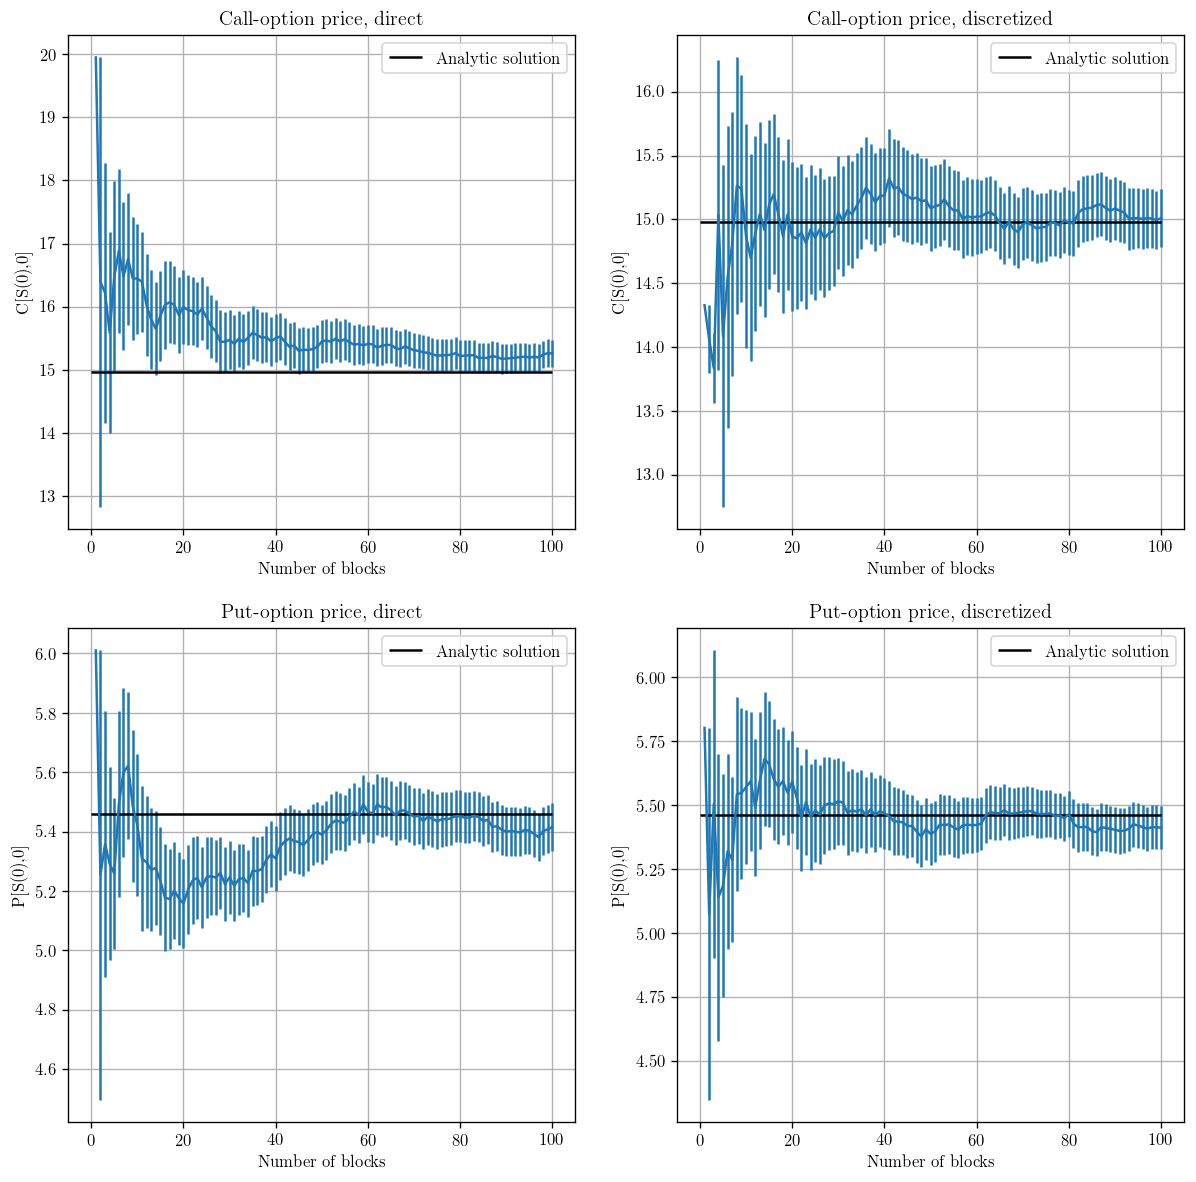

In [25]:
import matplotlib
import matplotlib.pyplot as plt

n_call_direct,avg_call_direct,err_call_direct=np.loadtxt("Ex_03_1/out_call_direct.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_call_discretized,avg_call_discretized,err_call_discretized=np.loadtxt("Ex_03_1/out_call_discretized.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_put_direct,avg_put_direct,err_put_direct=np.loadtxt("Ex_03_1/out_put_direct.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_put_discretized,avg_put_discretized,err_put_discretized=np.loadtxt("Ex_03_1/out_put_discretized.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax = plt.subplots(2, 2, figsize=(12,12),dpi=120)
ax[0,0].errorbar(n_call_direct, avg_call_direct, yerr=err_call_direct)
ax[0,0].set_title(r"Call-option price, direct")
ax[0,1].errorbar(n_call_discretized, avg_call_discretized, yerr=err_call_discretized)
ax[0,1].set_title(r"Call-option price, discretized")
ax[1,0].errorbar(n_put_direct, avg_put_direct, yerr=err_put_direct)
ax[1,0].set_title(r"Put-option price, direct")
ax[1,1].errorbar(n_call_discretized, avg_put_discretized, yerr=err_put_discretized)
ax[1,1].set_title(r"Put-option price, discretized")

for axis in ax[0]:
    axis.set_ylabel(r"C[S(0),0]")
    axis.set_xlabel("Number of blocks")
    axis.grid(True)
    axis.hlines(call_analytic,0,100,label="Analytic solution")
    axis.legend()
for axis in ax[1]:
    axis.set_ylabel(r"P[S(0),0]")
    axis.set_xlabel("Number of blocks")
    axis.grid(True)
    axis.hlines(put_analytic,0,100,label="Analytic solution")
    axis.legend()


Sono qui rappresentati gli andamenti delle stime dei prezzi delle opzioni call e put con le rispettive incertezze utilizzando i due metodi di campionamento di $S(T)$. La linea nera orizzontale rappresenta il valore atteso, cioè quello calcolato analiticamente. In tutti i casi il risultato converge al valore atteso e non si riscontra una differenza apprezzabile neanche nella stima delle incertezze.